### import library

In [1]:
import pandas as pd
import sqlalchemy as sqla
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Sub Bab Data Wrangling

In [3]:
# from html
url = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list"
df = pd.read_html(url)[0]
print(df.shape)
df.head(2)

(568, 7)


,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544


In [4]:
# from xml
df = pd.read_xml("https://www.w3schools.com/xml/books.xml")
print(df.shape)
df.head(2)

(4, 6)


,category,title,author,year,price,cover
0,cooking,Everyday Italian,Giada De Laurentiis,2005,30.00,None
1,children,Harry Potter,J K. Rowling,2005,29.99,None


In [ ]:
# from database sql
db = sqla.create_engine("sqlite:///mydata.sqlite")
pd.read_sql_table("table_name", db)
pd.read_sql_query("SELECT * FROM table_name", db)
pd.read_sql("SELECT * FROM table_name", db)

In [5]:
# Dummy data for product_df
product_data = {
  'product_id': [101, 102, 103, 104],
  'product_name': ['Product A', 'Product B', 'Product C', 'Product D'],
  'price': [20, 30, 25, 15]
}

product_df = pd.DataFrame(product_data)

# Dummy data for orders_df
orders_data = {
  'order_id': [1, 2, 3, 4, 5],
  'product_id': [101, 103, 102, 104, 101],
  'quantity': [2, 1, 3, 2, 1]
}

orders_df = pd.DataFrame(orders_data)

# Merge function
new_order_df = pd.merge(
  left=product_df,
  right=orders_df,
  how="inner",
  left_on="product_id",
  right_on="product_id"
)

# Display the result
print(new_order_df)

   product_id product_name  price  order_id  quantity
0         101    Product A     20         1         2
1         101    Product A     20         5         1
2         102    Product B     30         3         3
3         103    Product C     25         2         1
4         104    Product D     15         4         2


In [6]:

# Membuat dummy data dengan beberapa pencilan
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 1000), np.random.normal(10, 1, 50)])

# Identifikasi outlier menggunakan IQR method
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in data if x < minimum or x > maximum]

# Tampilkan hasil
print("Data:", data)
print("Outliers:", outliers)

Data: [ 0.49671415 -0.1382643   0.64768854 ...  8.42360784 11.47654035
 11.38009135]
Outliers: [3.852731490654721, -3.2412673400690726, 3.0788808084552377, -2.6968866429415717, -2.650969808393012, 11.399355436586003, 10.924633682912768, 10.059630369920175, 9.353063222294427, 10.69822331361359, 10.39348538542175, 10.895193220027732, 10.63517180168197, 11.049552715319335, 9.464764788439432, 11.317394065634325, 10.1975996046924, 12.075260872625265, 9.310812181910432, 11.73596380316525, 10.197910783462648, 9.348581996385551, 9.516114165945678, 9.67965269180568, 10.424165946401917, 10.522835488035499, 9.42629999606142, 9.975645407739018, 12.142270358611864, 11.727543170100711, 10.436323669674032, 10.0380034781682, 10.12003132671826, 10.613517972730417, 8.977207434801594, 9.742623462576654, 8.33141592612241, 10.39922312260528, 10.64719593970274, 9.516813537700626, 11.573986763290034, 8.774234336997658, 8.53562511979018, 10.224451818559972, 11.047098302612154, 11.68392769145787, 9.54111573713

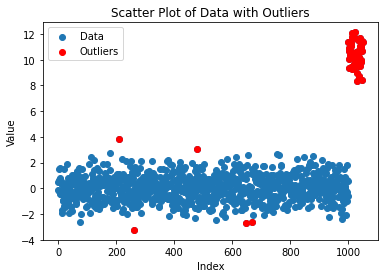

In [7]:
# Scatter plot untuk menampilkan data dan outliers
plt.scatter(range(len(data)), data, label='Data')
plt.scatter([i for i, x in enumerate(data) if x in outliers], outliers, color='r', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Scatter Plot of Data with Outliers')
plt.show()

In [11]:
# Mengatasi missing value dengan interpolation
data=pd.read_csv('data\BBCA_JK.csv')
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-19,8650.0,8700.0,8600.0,8650.0,8440.219727,67482900
1,2022-12-20,8550.0,8650.0,8550.0,8575.0,8367.039063,41243700


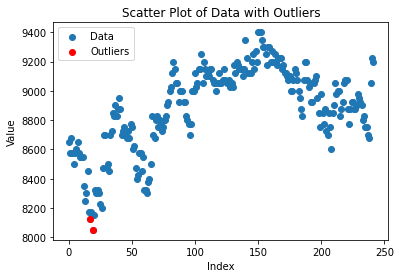

In [14]:
temp = data.Close
q25, q75 = np.percentile(temp, 25), np.percentile(temp, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in temp if x < minimum or x > maximum]

# Scatter plot untuk menampilkan data dan outliers
plt.scatter(range(len(temp)), temp, label='Data')
plt.scatter([i for i, x in enumerate(temp) if x in outliers], outliers, color='r', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Scatter Plot of Data with Outliers')
plt.show()


Data Awal:
2

Data Setelah Interpolasi:
0


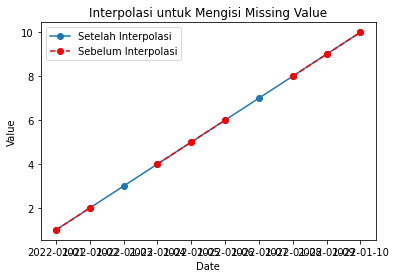

In [30]:
# Membuat DataFrame dummy dengan missing value
data = {'Date': pd.date_range(start='2022-01-01', end='2022-01-10', freq='D'),
        'Value': [1, 2, np.nan, 4, 5, 6, np.nan, 8, 9, 10]}

df = pd.DataFrame(data)
dfResult = df.copy()

# Menampilkan data awal
print("Data Awal:")
print(df.Value.isna().sum())

# Melakukan interpolasi untuk mengisi missing value
dfResult['Value'] = df['Value'].interpolate()

# Menampilkan data setelah interpolasi
print("\nData Setelah Interpolasi:")
print(dfResult.Value.isna().sum())

# Plot data awal dan setelah interpolasi
plt.plot(dfResult['Date'], dfResult['Value'], marker='o', label='Setelah Interpolasi')
plt.plot(df['Date'], df['Value'], 'r--', marker='o', label='Sebelum Interpolasi')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Interpolasi untuk Mengisi Missing Value')
plt.show()

In [31]:
# Membuat dummy data dengan outlier
np.random.seed(42)
data = {
    'TotalCharges': np.concatenate([np.random.normal(500, 50, 950), np.random.normal(2000, 100, 50)])
}

df = pd.DataFrame(data)

# Menampilkan data awal
print("Data Awal:")
print(df.shape)

# Deteksi dan penghapusan outlier
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

# Menampilkan data setelah penghapusan outlier
print("\nData Setelah Penghapusan Outlier:")
print(df.shape)

Data Awal:
(1000, 1)

Data Setelah Penghapusan Outlier:
(946, 1)


C:\Users\IBRA\AppData\Local\Temp\ipykernel_6060\2272553847.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[kondisi_more_than].index, inplace=True)


In [41]:
# Membuat dummy data dengan outlier
np.random.seed(42)
data = {
    'TotalCharges': np.concatenate([np.random.normal(500, 50, 950), np.random.normal(2000, 100, 50)])
}

df = pd.DataFrame(data)

# Menampilkan data awal
print("Data Awal:")
print(df.shape)

# Deteksi dan penanganan outlier menggunakan mask
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum

# Menambahkan kolom 'Outlier' untuk menyimpan informasi outlier
df['Outlier'] = False
df.loc[kondisi_lower_than | kondisi_more_than, 'Outlier'] = True

# Menggunakan mask untuk penanganan outlier
df['TotalCharges'].mask(kondisi_lower_than, minimum, inplace=True)
df['TotalCharges'].mask(kondisi_more_than, maximum, inplace=True)

# Menampilkan data setelah penanganan outlier
print("\nData Setelah Penanganan Outlier:")
print(df.shape)

# Menampilkan informasi baris yang termasuk outlier
outliers_data = df[df['Outlier']]
print("\nData Outlier:")
print(outliers_data.shape)

Data Awal:
(1000, 1)

Data Setelah Penanganan Outlier:
(1000, 2)

Data Outlier:
(54, 2)


### Sub Bab Exploratory Data Analysis

In [42]:
# Pivot with groubBy
body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("age", "height_cm", "weight_kg"))

body_measurement_df.groupby(by="age").mean()

,height_cm,weight_kg
age,,
2,85.038000,11.2700
3,94.573333,14.2300
4,100.202500,15.4575
5,107.950000,17.6850
6,115.316667,19.2500
7,121.795000,25.6800


In [43]:
# pivot multi parameter
body_measurement_df.groupby(by='age').agg({
    'height_cm': 'mean',
    'weight_kg': ['mean','max', 'min'],
})

height_cm weight_kg              
           mean      mean    max    min
age                                    
2     85.038000   11.2700  14.18   8.40
3     94.573333   14.2300  14.41  14.05
4    100.202500   15.4575  16.97  13.17
5    107.950000   17.6850  20.01  15.36
6    115.316667   19.2500  20.14  17.55
7    121.795000   25.6800  28.40  22.96

In [3]:
sample_data = {
    'name': ['John', 'Alia', 'Ananya', 'Steve', 'Ben'],
    'age': [24, 22, 23, 25, 28],  
    'communication_skill_score': [85, 70, 75, 90, 90],
    'quantitative_skill_score': [80, 90, 80, 75, 70]
}
df = pd.DataFrame(sample_data)

# Menghitung kovarian antar kolom-kolom numerik
covariance_matrix = df.cov()

# Menampilkan matriks kovarian
print("Matriks Kovarian:")
print(covariance_matrix)

Matriks Kovarian:
                             age  communication_skill_score  \
age                         5.30                      17.75   
communication_skill_score  17.75                      82.50   
quantitative_skill_score  -15.75                     -60.00   

                           quantitative_skill_score  
age                                          -15.75  
communication_skill_score                    -60.00  
quantitative_skill_score                      55.00  


In [4]:
numeric_df = df.select_dtypes(include='number')
covariance_matrix = numeric_df.cov()
print("Matriks Kovarian (hanya kolom numerik):")
print(covariance_matrix)

Matriks Kovarian (hanya kolom numerik):
                             age  communication_skill_score  \
age                         5.30                      17.75   
communication_skill_score  17.75                      82.50   
quantitative_skill_score  -15.75                     -60.00   

                           quantitative_skill_score  
age                                          -15.75  
communication_skill_score                    -60.00  
quantitative_skill_score                      55.00  


### Sub Bab Data Visualization

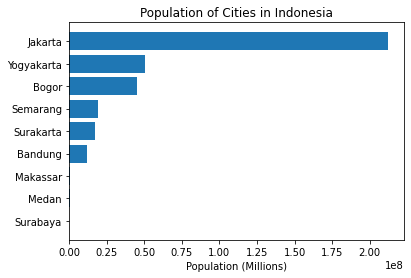

In [44]:
# Bar Plot
cities = ('Bogor', 'Bandung', 'Jakarta', 'Semarang', 'Yogyakarta',
          'Surakarta','Surabaya', 'Medan', 'Makassar')
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 17579085,
              3481, 287750, 785409)
df = pd.DataFrame({
    'Cities': cities,
    'Population': populations,
})
df.sort_values(by='Population', inplace=True)

plt.barh(y=df["Cities"], width=df["Population"])
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

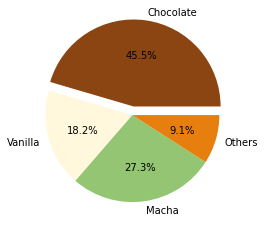

In [45]:
# Pie Chart with explode
flavors = ('Chocolate', 'Vanilla', 'Macha', 'Others')
votes = (50, 20, 30, 10)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

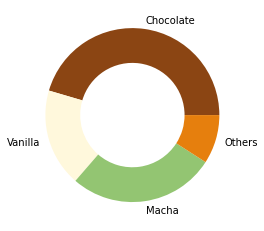

In [46]:
# Donut chart
plt.pie(
    x=votes,
    labels=flavors,
    colors=colors,
    wedgeprops = {'width': 0.4}
)
plt.show()

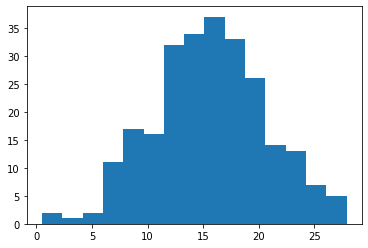

In [47]:
# create data random with normal distribution
x = np.random.normal(15, 5, 250)

plt.hist(x=x, bins=15)
plt.show()

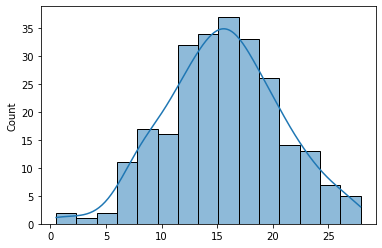

In [48]:
# histogram with kde
sns.histplot(x=x, bins=15, kde=True)
plt.show()

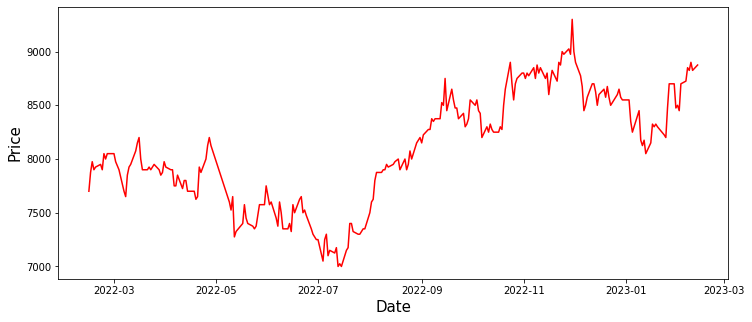

In [49]:
# line chart with time series (saham bca)
url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color='red')
plt.xlabel('Date',size=15)
plt.ylabel('Price',size=15)
plt.show()

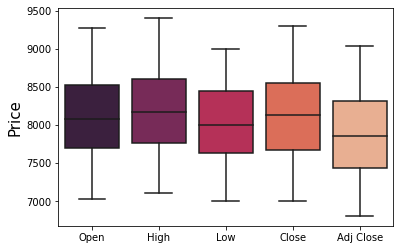

In [50]:
# Box plot with different color
url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

df_boxplot = df[["Open", "High", "Low", "Close", "Adj Close"]]

sns.boxplot(data=df_boxplot, palette="rocket")
plt.ylabel('Price',size=15)
plt.show()

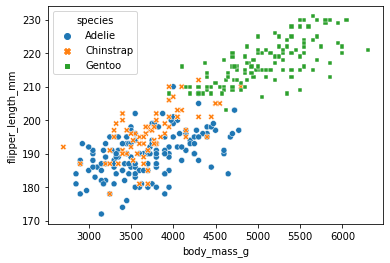

In [52]:
penguins = sns.load_dataset("penguins")
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", style="species")
plt.show()

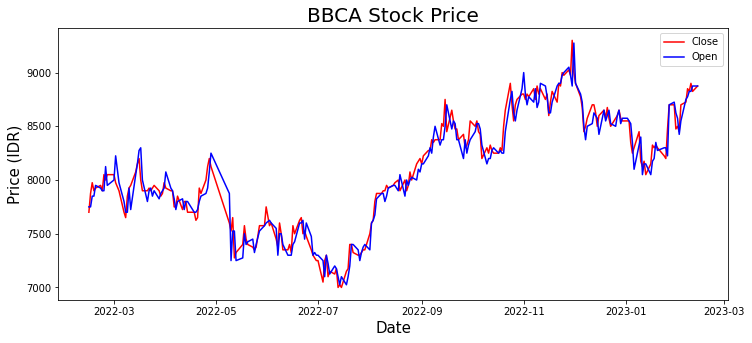

In [53]:
# line chart with components
url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Close', color='red')
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.title('BBCA Stock Price', size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Price (IDR)',size=15)
plt.legend()
plt.show()

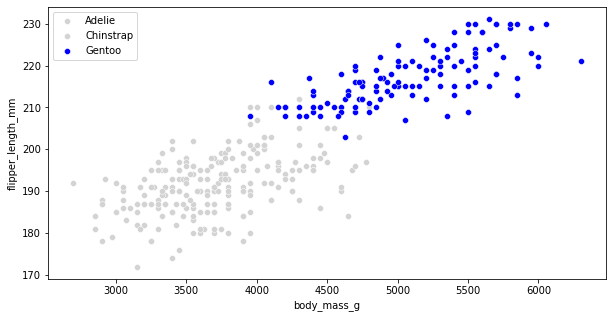

In [54]:
penguins_df = sns.load_dataset("penguins")

adelie_df = penguins_df[penguins_df.species == "Adelie"]
chinstrap_df = penguins_df[penguins_df.species == "Chinstrap"]
gentoo_df = penguins_df[penguins_df.species == "Gentoo"]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=adelie_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Adelie")
sns.scatterplot(data=chinstrap_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Chinstrap")
sns.scatterplot(data=gentoo_df, x="body_mass_g", y="flipper_length_mm", facecolor="blue", label="Gentoo")
plt.legend()
plt.show()

### [Tambahan] Drop duplicat dalam rentang

In [ ]:
def similar(a, b):
  return SequenceMatcher(None, a, b).ratio()

i = 0
count = 0

while(i < df.shape[0]-1):
  thres = similar(df['text'].iloc[i], df['text'].iloc[i+1])

  if(0.60 < thres <= 1.0):
    print(f"{i}  =   {i+1}   =  {thres}")
    count += 1
    df = df.drop([i+1]).reset_index(drop=True)
  else:
    i += 1

In [ ]:
print(f"Jumlah Keapus {count}")